In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.style.use("/home1/smaruj/akitaX1-analyses/figures/plot_styles/global_plotting_style.mplstyle")
from scipy import stats
from cooltools.lib import numutils

/home1/smaruj/miniconda3/envs/basenji_py3.9_tf2.15/lib/python3.9/site-packages/cooltools/lib/numutils.py:652: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def iterative_correction_symmetric(
/home1/smaruj/miniconda3/envs/basenji_py3.9_tf2.15/lib/python3.9/site-packages/cooltools/lib/numutils.py:727: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def iterative_co

In [2]:
from akita_utils.analysis_utils import split_by_percentile_groups

import sys
sys.path.insert(0, "/home1/smaruj/akitaX1-analyses/utils/")
from reading_averaging_utils import read_and_average_insulation_offset_data

2024-07-22 16:48:04.801103: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-22 16:48:04.801162: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-22 16:48:04.802702: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-22 16:48:04.815956: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-22 16:48:05.681971: W tensorflow/comp

In [3]:
# directory with experiment data
data_dir = "/project/fudenber_735/akitaX1_analyses_data/virtual_insertion_insulation_offset/orientation/"

In [4]:
df = read_and_average_insulation_offset_data(data_dir)

In [5]:
df.groupby(["orientation"]).agg({"OFF-16": ["min", "max", "mean"],
                                 "OFF-64": ["min", "max", "mean"],
                                "OFF-128": ["min", "max", "mean"]})

OFF-16                        OFF-64                      \
                  min       max      mean       min       max      mean   
orientation                                                               
<<<<<<      -0.041656  1.083008  0.423787  3.291016  9.500000  5.758678   
<<<<<>      -0.625000  0.291748 -0.218942  0.000122  2.666016  0.954581   
<<<<>>      -0.833008 -0.083374 -0.441153 -0.791992  0.499756 -0.157264   
<<<>>>      -0.916992 -0.250000 -0.595013 -1.291992 -0.083374 -0.613520   
<<>>>>      -1.125000 -0.375000 -0.781485 -2.332031 -0.416504 -1.089314   
<>>>>>      -1.541016 -0.583496 -1.085925 -5.042969 -1.166016 -2.159470   
><<<<<      -0.666992  0.374756 -0.134347 -0.458008  2.917969  1.302812   
>><<<<      -1.125000  0.208618 -0.356947 -1.458008  1.166992 -0.057892   
>>><<<      -1.291992  0.250488 -0.503864 -2.500000  0.625488 -0.647198   
>>>><<      -1.541992 -0.000122 -0.814548 -3.833984 -0.333252 -1.406522   
>>>>><      -2.125000 -0.625000 -1.293433 -6.164062 -1.208008 -2.813873   
>>>>>>      -2.332031 -1.208984 -1.708140 -9.546875 -3.500000 -6.320201   

               OFF-128                       
                   min        max      mean  
orientation                                  
<<<<<<        5.664062  12.210938  9.567433  
<<<<<>        0.625000   5.500000  2.512084  
<<<<>>       -0.625000   1.583984  0.393901  
<<<>>>       -1.541992   0.291992 -0.464798  
<<>>>>       -3.414062  -0.375000 -1.297070  
<>>>>>       -6.750000  -1.458008 -3.048762  
><<<<<        0.416504   6.417969  3.241470  
>><<<<       -1.291016   2.873047  0.746567  
>>><<<       -2.625000   1.958008 -0.247957  
>>>><<       -4.750000   0.166992 -1.523974  
>>>>><       -8.296875  -1.583984 -3.831444  
>>>>>>      -12.882812  -6.335938 -9.401160

In [6]:
summary_df = df.groupby(["orientation"]).agg({"OFF-16": "mean",
                                 "OFF-64": "mean",
                                "OFF-128": "mean"}).reset_index()

In [7]:
# order of orientations
orients_plot1 = ["<<<<<<", "<<<<<>", "<<<<>>", "<<<>>>", "<<>>>>", "<>>>>>", ">>>>>>"]
orients_plot2 = ["<<<<<<", "><<<<<", ">><<<<", ">>><<<", ">>>><<", ">>>>><", ">>>>>>"]

In [8]:
plot1 = summary_df[summary_df["orientation"].isin(orients_plot1)].sort_values(by="orientation").reset_index(drop=True)
plot2 = summary_df[summary_df["orientation"].isin(orients_plot2)].sort_values(by="orientation").reset_index(drop=True)

In [9]:
window_128 = 128 * 2048 // 1000
window_64 = 64 * 2048 // 1000
window_16 = 16 * 2048 // 1000

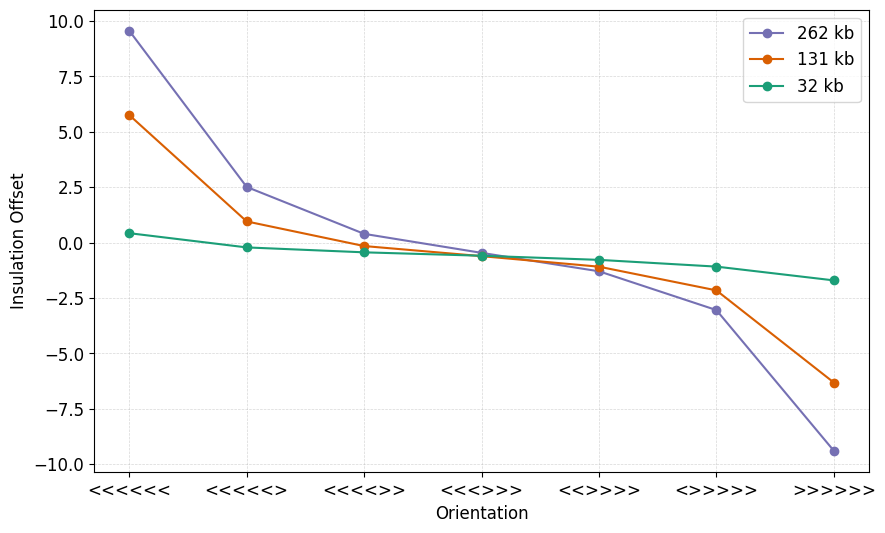

In [10]:
plt.figure(figsize=(10, 6))
plt.plot([i for i in range(len(plot1))], plot1["OFF-128"], marker='o', c="#7570b3", label=f"{window_128} kb")
plt.plot([i for i in range(len(plot1))], plot1["OFF-64"], marker='o', c="#d95f02", label=f"{window_64} kb")
plt.plot([i for i in range(len(plot1))], plot1["OFF-16"], marker='o', c="#1b9e77", label=f"{window_16} kb")

plt.xlabel('Orientation')
plt.ylabel('Insulation Offset')
# plt.title('Mean Values Insulation Offset')
plt.xticks(range(len(plot1)), plot1["orientation"])

plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.5)

# plt.savefig("./plots/insulation_offset_orientation_right.pdf", format="pdf", bbox_inches="tight")

plt.show()

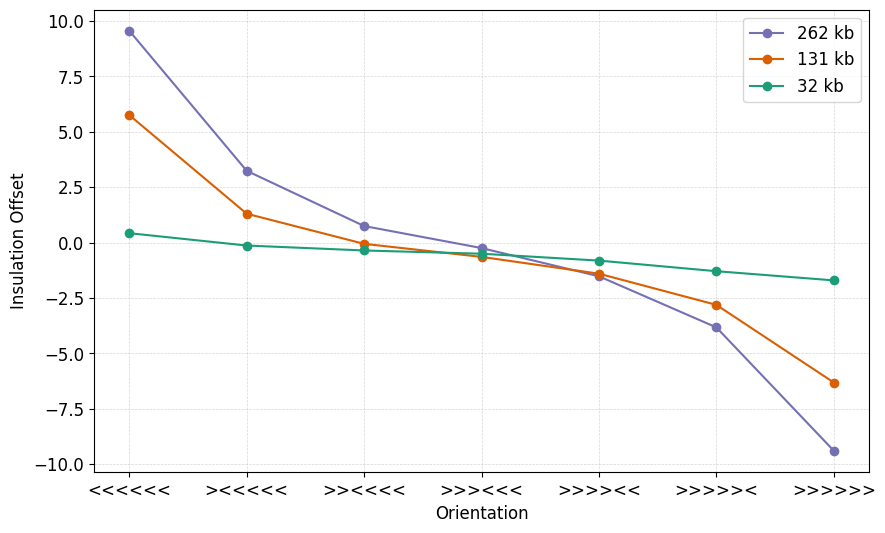

In [11]:
plt.figure(figsize=(10, 6))
plt.plot([i for i in range(len(plot2))], plot2["OFF-128"], marker='o', c="#7570b3", label=f"{window_128} kb")
plt.plot([i for i in range(len(plot2))], plot2["OFF-64"], marker='o', c="#d95f02", label=f"{window_64} kb")
plt.plot([i for i in range(len(plot2))], plot2["OFF-16"], marker='o', c="#1b9e77", label=f"{window_16} kb")

plt.xlabel('Orientation')
plt.ylabel('Insulation Offset')
# plt.title('Mean Values Insulation Offset')
plt.xticks(range(len(plot2)), plot2["orientation"])

plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.5)

# plt.savefig("./plots/insulation_offset_orientation_left.pdf", format="pdf", bbox_inches="tight")

plt.show()